# Covid-19 Survey EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import textwrap
import re

%reload_ext google.colab.data_table

The first step was to import my libraries that I may use. 

In [2]:
covid_project = pd.read_csv('https://storage.googleapis.com/hk6780/hands_on_project_covid_data.csv')

df=pd.DataFrame(covid_project)

covid_project.head()

,row_id,code,country,region_code,region,region.1,wave,month,year,indicator_topic,...,unit_measure,measure_type,GDP_pc,ln_GDP_pc,weight_type,footnote,survey_producer,survey_link,last_updated,source
0,1,AFG,Afghanistan,SAR,South Asia,SAR,WAVE1,9.0,2020,Demographic,...,Percent of respondent,p,2065.0,8.0,Individual weight,NaN,NaN,NaN,01/31/2022 13:26PM,High Frequency Phone Survey
1,2,AFG,Afghanistan,SAR,South Asia,SAR,WAVE1,9.0,2020,Demographic,...,Percent of respondent,p,2065.0,8.0,Individual weight,(*) the category includes incomplete and compl...,NaN,NaN,01/31/2022 13:26PM,High Frequency Phone Survey
2,3,AFG,Afghanistan,SAR,South Asia,SAR,WAVE1,9.0,2020,Demographic,...,Percent of respondent,p,2065.0,8.0,Individual weight,(*) the category includes incomplete and compl...,NaN,NaN,01/31/2022 13:26PM,High Frequency Phone Survey
3,4,AFG,Afghanistan,SAR,South Asia,SAR,WAVE1,9.0,2020,Demographic,...,Percent of respondent,p,2065.0,8.0,Individual weight,(*) the category includes incomplete post-seco...,NaN,NaN,01/31/2022 13:26PM,High Frequency Phone Survey
4,5,AFG,Afghanistan,SAR,South Asia,SAR,WAVE1,9.0,2020,Demographic,...,Percent of respondent,p,2065.0,8.0,Unweighted,NaN,NaN,NaN,01/31/2022 13:26PM,High Frequency Phone Survey


Next, I uploaded my file and defined it as covid_project. After that, I checked to make sure the document was uploaded property by calling the covid_project.head() command. 

In [17]:
covid_project=df.drop(columns=['survey_producer', 'row_id', 'month', 'year', 'region.1', 'region_code', 'code', 'indicator_description', 'source', 'last_updated', 'survey_link', 'footnote', 'weight_type', 'ln_GDP_pc', 'GDP_pc', 'measure_type', 'unit_measure', 'lending_category'])

covid_project["indicator_display"] = covid_project["indicator_display"].str.replace("Level of education - ","")



covid_project.head()

,country,region,wave,indicator_topic,indicator,indicator_display,indicator_val,urban_rural,industry,sample_subset,sample_total,FCS,income_group
0,Afghanistan,South Asia,WAVE1,Demographic,Demo_educ1,No education,70.0,National,All,5013,5057.0,High-Intensity Conflict,Low income
1,Afghanistan,South Asia,WAVE1,Demographic,Demo_educ2,Any Primary,5.0,National,All,5013,5057.0,High-Intensity Conflict,Low income
2,Afghanistan,South Asia,WAVE1,Demographic,Demo_educ3,Any Secondary,16.0,National,All,5013,5057.0,High-Intensity Conflict,Low income
3,Afghanistan,South Asia,WAVE1,Demographic,Demo_educ4,Any Post Secondary,10.0,National,All,5013,5057.0,High-Intensity Conflict,Low income
4,Afghanistan,South Asia,WAVE1,Demographic,Demo_male_sample,Male respondents (% of respondents unweighted),71.0,National,All,5053,5057.0,High-Intensity Conflict,Low income


Here, I have dropped a number of columns that I am not planning on using to help clean my data. This will allow me to better work with the information that I want to study. 

In [4]:
list(covid_project)

['country',
 'region',
 'wave',
 'indicator_topic',
 'indicator',
 'indicator_display',
 'indicator_val',
 'urban_rural',
 'industry',
 'sample_subset',
 'sample_total',
 'FCS',
 'income_group']

This is the list of the columns in the DataFrame.

In [5]:
df.shape

(121084, 31)

In [6]:
covid_project.dtypes

country               object
region                object
wave                  object
indicator_topic       object
indicator             object
indicator_display     object
indicator_val        float64
urban_rural           object
industry              object
sample_subset          int64
sample_total         float64
FCS                   object
income_group          object
dtype: object

Here I am identifying the type of data found in each column. 

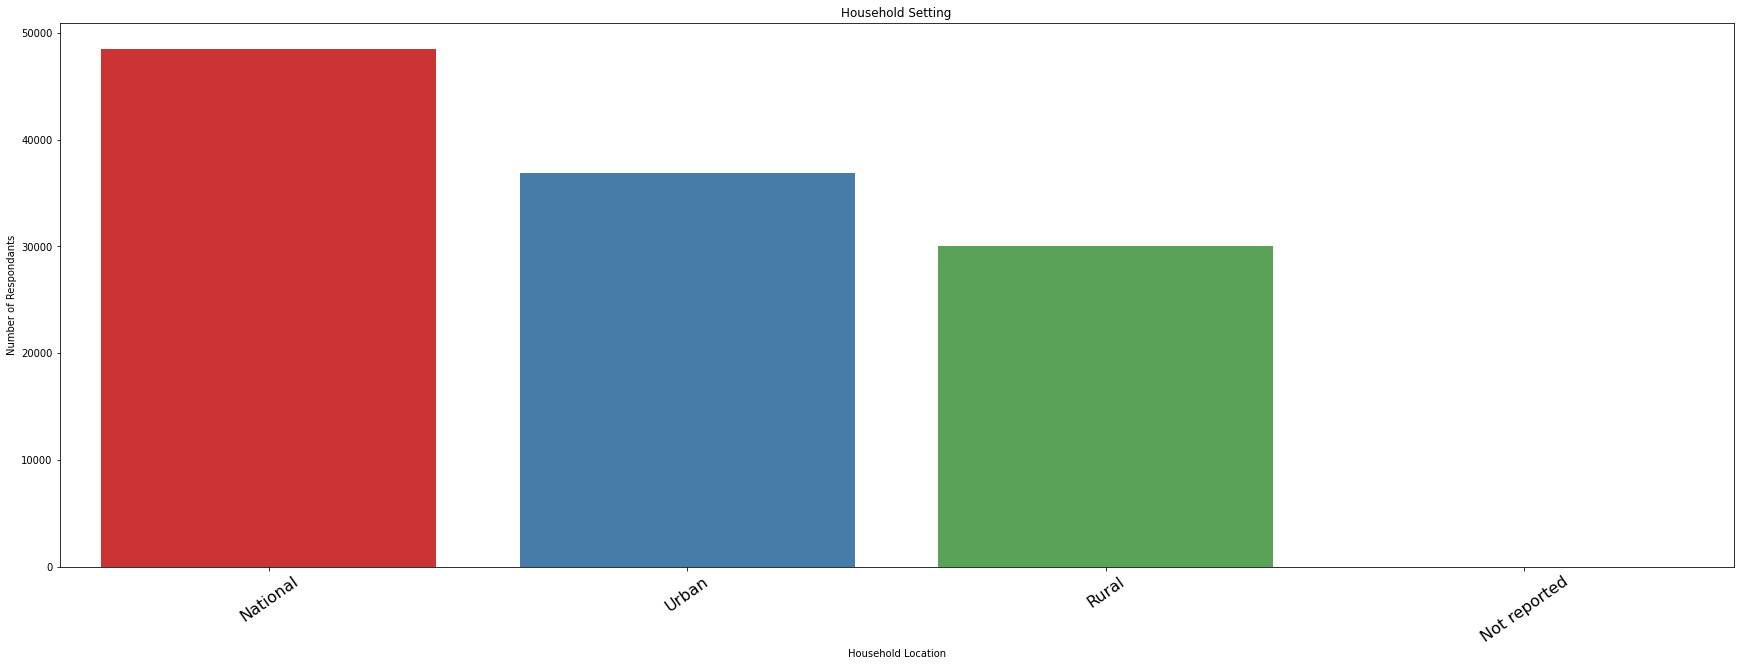

In [7]:
ax = sns.countplot(x='urban_rural', data=covid_project, palette='Set1');
ax.set(xlabel='Household Location', ylabel='Number of Respondants')
ax.set_xticklabels(ax.get_xticklabels(), rotation=35, fontsize=16)
ax.set_title("Household Setting") 
ax.figure.set_size_inches(30, 10)

Before I started diving into any specifics, I wanted to get a quick overview of where, within each country, the majority of our respondants resided. I was not surprised to see Urban be represented by a larger sample size than Rural. 

In [8]:
covid_project = covid_project[covid_project.urban_rural.isin(['National'])]
covid_project = covid_project[covid_project.industry.isin(['All'])]

In [9]:
covid_project_Peru = covid_project[covid_project.country.isin(['Peru'])]


covid_project_Peru.head()

,country,region,wave,indicator_topic,indicator,indicator_display,indicator_val,urban_rural,industry,sample_subset,sample_total,FCS,income_group
84374,Peru,Latin America & Caribbean,WAVE1,Assets & Services,Asse_intern,Used internet services last week (% of HHs),34.0,National,All,1000,1000.0,NaN,Upper middle income
84385,Peru,Latin America & Caribbean,WAVE1,Coping,Copi_reduce,Reduced consumption of goods (essential or non...,63.0,National,All,1000,1000.0,NaN,Upper middle income
84396,Peru,Latin America & Caribbean,WAVE1,Coping,Copi_sold,Sold assets to pay for basic living expenses d...,7.0,National,All,1000,1000.0,NaN,Upper middle income
84407,Peru,Latin America & Caribbean,WAVE1,Coping,Copi_used,Used emergency savings to cover basic living e...,30.0,National,All,1000,1000.0,NaN,Upper middle income
84418,Peru,Latin America & Caribbean,WAVE1,Demographic,Demo_educ1,No education,1.0,National,All,998,1000.0,NaN,Upper middle income


I chose to spend the majority of my time studying the data from Peru. I was drawn to this because my parents were teaching in Peru when Covid-19 arrived on the scene and they stayed there until Fall of 2021. 

In [10]:
covid_project_Peru_coping = covid_project_Peru[covid_project_Peru.indicator_topic.isin(['Coping']) & covid_project_Peru.wave.isin(['WAVE1'])]


covid_project_Peru_coping.head()

,country,region,wave,indicator_topic,indicator,indicator_display,indicator_val,urban_rural,industry,sample_subset,sample_total,FCS,income_group
84385,Peru,Latin America & Caribbean,WAVE1,Coping,Copi_reduce,Reduced consumption of goods (essential or non...,63.0,National,All,1000,1000.0,NaN,Upper middle income
84396,Peru,Latin America & Caribbean,WAVE1,Coping,Copi_sold,Sold assets to pay for basic living expenses d...,7.0,National,All,1000,1000.0,NaN,Upper middle income
84407,Peru,Latin America & Caribbean,WAVE1,Coping,Copi_used,Used emergency savings to cover basic living e...,30.0,National,All,1000,1000.0,NaN,Upper middle income


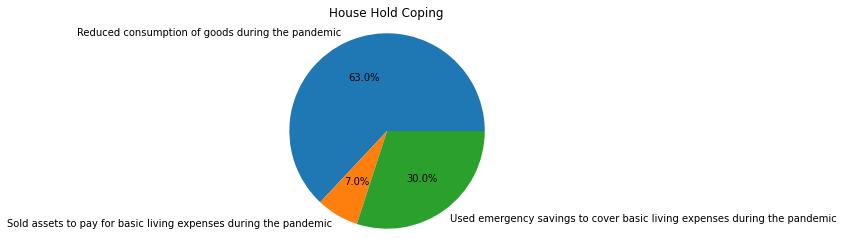

In [11]:
my_data = [63.0, 7.0, 30.0]
my_labels = 'Reduced consumption of goods during the pandemic ','Sold assets to pay for basic living expenses during the pandemic','Used emergency savings to cover basic living expenses during the pandemic'
plt.pie(my_data,labels=my_labels,autopct='%1.1f%%')
plt.title('House Hold Coping')
plt.axis('equal')
plt.show()

This pie chart represents the responses and the house hold percentages of how they responded to the question regarding how they coped with the changes brough on by Covid-19. I was shocked to see that 7% of the Peruvians surveyed, had sold assets to pay for basic living expenses during the pandemic. 

In [12]:

covid_project_Peru_education = covid_project_Peru[covid_project_Peru.indicator.isin(['Demo_educ1', 'Demo_educ2', 'Demo_educ3', 'Demo_educ4']) & covid_project_Peru.wave.isin(['WAVE1'])]

covid_project_Peru_education.head()

,country,region,wave,indicator_topic,indicator,indicator_display,indicator_val,urban_rural,industry,sample_subset,sample_total,FCS,income_group
84418,Peru,Latin America & Caribbean,WAVE1,Demographic,Demo_educ1,No education,1.0,National,All,998,1000.0,NaN,Upper middle income
84429,Peru,Latin America & Caribbean,WAVE1,Demographic,Demo_educ2,Any Primary,12.0,National,All,998,1000.0,NaN,Upper middle income
84440,Peru,Latin America & Caribbean,WAVE1,Demographic,Demo_educ3,Any Secondary,41.0,National,All,998,1000.0,NaN,Upper middle income
84451,Peru,Latin America & Caribbean,WAVE1,Demographic,Demo_educ4,Any Post Secondary,46.0,National,All,998,1000.0,NaN,Upper middle income


Text(0, 0.5, 'Percent of Respondents')

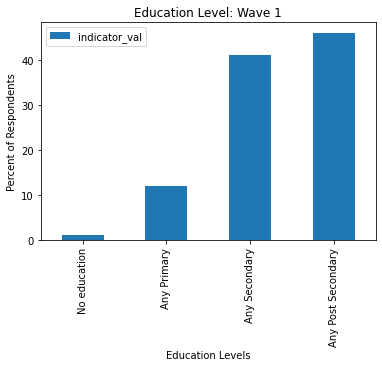

In [13]:
bargraph = covid_project_Peru_education.plot.bar(x="indicator_display", y="indicator_val")

plt.title('Education Level: Wave 1')
plt.xlabel('Education Levels')
plt.ylabel('Percent of Respondents')

This Bar Graph represents the Education Level responses for the respondants from Peru. The Data included respondants from Wave 1, so this graph. The Education Level options for the respondants was "No Education", "Any Primary", "Any Secondary", "Any Post Secondary". 

In [14]:
group2 = covid_project_Peru_education.groupby(['indicator_display', 'indicator_val', 'wave'])

print(group2.size())

indicator_display   indicator_val  wave 
Any Post Secondary  46.0           WAVE1    1
Any Primary         12.0           WAVE1    1
Any Secondary       41.0           WAVE1    1
No education        1.0            WAVE1    1
dtype: int64


I ran this groupby command in order to see, in table format, the previous graph. 

In [15]:
covid_project_Peru_vaccination = covid_project_Peru[covid_project_Peru.indicator_topic.isin(['Vaccination'])]

covid_project_Peru_vaccination = covid_project_Peru_vaccination[covid_project_Peru_vaccination['indicator'].str.contains('Vac_concer')]

covid_project_Peru_vaccination.drop(covid_project_Peru_vaccination.index[covid_project_Peru_vaccination['indicator'] == 'Vac_concern_9'], inplace=True)

covid_project_Peru_vaccination["indicator_display"] = covid_project_Peru_vaccination["indicator_display"].str.replace("Not wanting or unsure about vaccination","")

covid_project_Peru_vaccination.head()


,country,region,wave,indicator_topic,indicator,indicator_display,indicator_val,urban_rural,industry,sample_subset,sample_total,FCS,income_group
86753,Peru,Latin America & Caribbean,WAVE4,Vaccination,Vac_concern_1,because do not think it will work *,28.0,National,All,122,1210.0,NaN,Upper middle income
86759,Peru,Latin America & Caribbean,WAVE4,Vaccination,Vac_concern_10,for other reasons *,21.0,National,All,122,1210.0,NaN,Upper middle income
86765,Peru,Latin America & Caribbean,WAVE4,Vaccination,Vac_concern_2,because they are worried about side effects *,41.0,National,All,122,1210.0,NaN,Upper middle income
86771,Peru,Latin America & Caribbean,WAVE4,Vaccination,Vac_concern_3,because they already had COVID-19 *,1.0,National,All,122,1210.0,NaN,Upper middle income
86777,Peru,Latin America & Caribbean,WAVE4,Vaccination,Vac_concern_4,because low risk of contracting COVID-19 *,3.0,National,All,122,1210.0,NaN,Upper middle income


I used the "isin" code to isolate the data for Vaccination questions, then further isolated the data to the responses indicating the respondants uncertainty or unwillingness to receive the vaccine. To do that, I used the "contain" order as a way of showing a second way to accomplish this type of command. Also, in this preparation step, I dropped the row with indicator, "Vac_concern_9" as it had zero respondants. Finally I cleaned this data by removing, "not wanting or unsure of vaccine".

Text(0.5, 0, 'Percentage of Respondants')

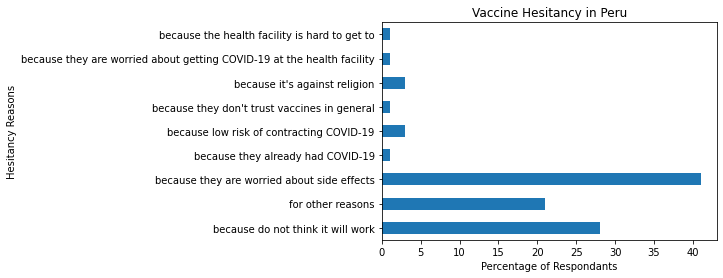

In [16]:

plotdata = pd.DataFrame(
    {"indicator_val": [28.0, 21.0, 41.0, 1.0, 3.0, 1.0, 3.0, 1.0, 1.0]}, 
    index=["because do not think it will work", "for other reasons", "because they are worried about side effects", "because they already had COVID-19", "because low risk of contracting COVID-19", "because they don't trust vaccines in general", "because it's against religion", "because they are worried about getting COVID-19 at the health facility", "because the health facility is hard to get to"])

plotdata['indicator_val'].plot(kind="barh")
plt.title("Vaccine Hesitancy in Peru")
plt.ylabel("Hesitancy Reasons")
plt.xlabel("Percentage of Respondants")

Here is a Horizontal Bar Chart. This graph represents the percentages of house holds that expressed hesistancy or an unwillingness to receive the vaccine, and why they expressed that hesistancy. 

# Conclusion:

As I stated earlier, I wanted to take a closer look at the statistics from Peru, as my parents spent much of the time of Covid-19 quarantines in the country of Peru. I started off with a broad view of the respondants and was not surprised to see that the majority of them reside in an urban environment. As I began to narrow down the data to get a closer look at information from the respondants from Peru, I was very surprised to see that 7% of the respondants had to sell assets in order to pay for basic living expenses. This was an important perspective to gain. The final graph that I created was definitely interesting and I would be very interested in studying more about the results of that portion of the survey, both in Peru and in many other parts of the world, and try to learn what the causes of the concern, specifically the answer that the respondants indicated they did not think the vaccine would work.